# Import necessary Python modules

In [60]:
import torch
import utils
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from dataloader import MultimodalDataloader, ImageDataloader
from networks import CNNRegression, MultimodalNetwork
from sklearn.metrics import mean_squared_error as mse

# Load all processed data and checkpoints

In [61]:
data_dict = torch.load('data/image_csv_processed.pt')
image_dict = torch.load('data/images_processed.pt')
model_2_losses = torch.load('model_losses/model_2_losses.pth')
model_3_losses = torch.load('model_losses/model_3_losses.pth')
model_2_state_dict = torch.load('model_checkpoints/CNN.ckpt')
model_3_state_dict = torch.load('model_checkpoints/MultimodalNN.ckpt')

x_train = data_dict['x_train']
y_train = data_dict['y_train']
x_val = data_dict['x_val']
y_val = data_dict['y_val']
x_test = data_dict['x_test']
y_test = data_dict['y_test']
x_test_image = image_dict['x_test_image']

# Random baseline model

In [57]:
min_age = min(y_test)
max_age = max(y_test)

# set random seed so that random predictions are similar when the notebook is rerun
np.random.seed(42)

random_pred = np.random.randint(low=min_age, high=max_age+1, size=y_test.shape)

## Plot true data vs the random predictions

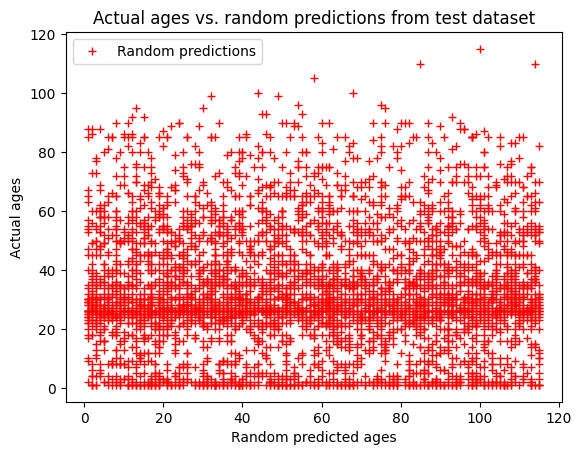

In [58]:
plt.plot(random_pred, y_test, 'r+', label='Random predictions')
plt.title('Actual ages vs. random predictions from test dataset')
plt.ylabel('Actual ages')
plt.legend()
plt.xlabel('Random predicted ages')
plt.show()

## Calculate and print RMSE score

In [59]:
rmse_score = np.sqrt(mse(y_test, random_pred))

print(f'The RMSE of the random baseline model is {rmse_score}')

The RMSE of the random baseline model is 45.673155300912704


# Classical model for predicting ages

## Load necessary data to both retrain and analyze the model

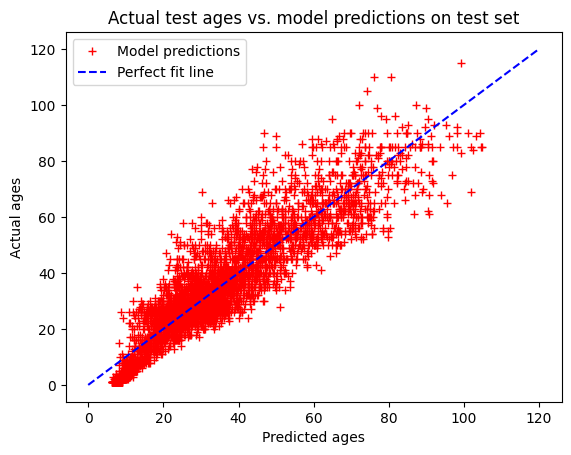

In [12]:
# Linear regression is used as the target feature is age
model = LinearRegression()

model = model.fit(x_train, y_train)

# it has been recommended online to test on the test dataset
pred = model.predict(x_test)

plt.plot(pred, y_test, 'r+', label='Model predictions')
plt.plot([0, 120], [0, 120], 'b--', label='Perfect fit line')
plt.xlabel('Predicted ages')
plt.ylabel('Actual ages')
plt.title('Actual test ages vs. model predictions on test set')
plt.legend()

## Analyze the results using appropriate metrics

In [13]:
# I use the Root Mean Squared Error here
# by taking the square root of the MSE score
# the results can be directly interpreted in terms of target feature
# For example: an RMSE of 10 means that on average, the model predicts 10 years from the actual age
rmse_score = np.sqrt(mse(y_test, pred))

print(f'The RMSE score is {rmse_score}')

The RMSE score is 8.084970474243164


# CNN model for predicting ages

## Setup the model and load the state dictionary

In [62]:
model = CNNRegression()

model.load_state_dict(model_2_state_dict)

<All keys matched successfully>

## Plot out the training and validation loss curves as well as the number of epochs used

Epochs used:  50
Final validation loss: 163.66057 
Note that this is MSE loss.
The RMSE loss is  12.792989


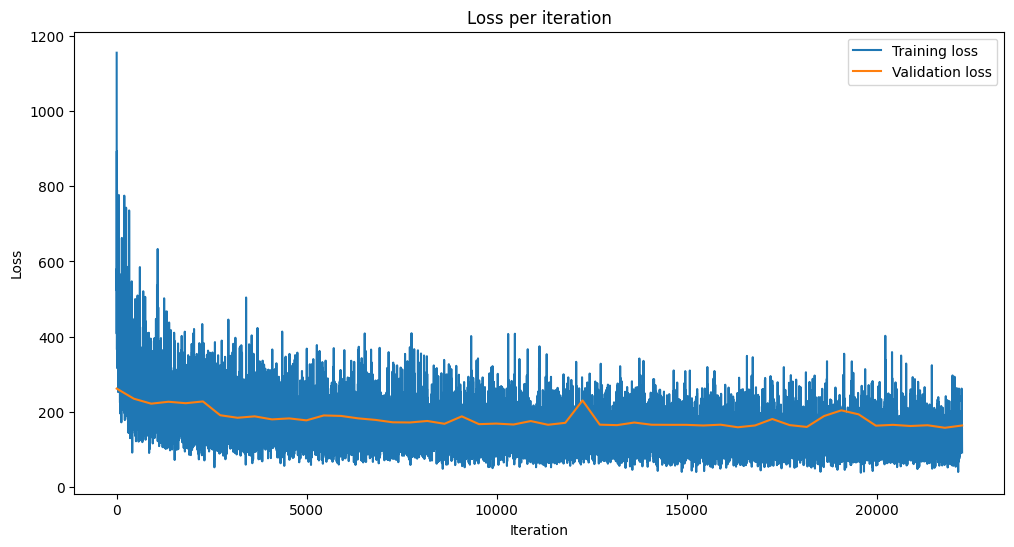

In [15]:
utils.plot_losses(model_2_losses['train_losses'], model_2_losses['val_losses'], model_2_losses['epochs'])

## Predict on the test dataset and show RMSE score

In [7]:
test_dataloader = ImageDataloader(x_test_image, y_test, batch_size=128, randomize=False)

# this ensures model's weights and biases do not change accidentally
model = model.eval()

pred = utils.run_inference(test_dataloader, model)

rmse_score = np.sqrt(mse(y_test, pred))

print(f'The RMSE loss for model 2 is {rmse_score}')

The RMSE loss for model 2 is 12.893837928771973


# Multimodal network for predicting ages

## Setup the model and load the state dictionary

In [63]:
model = MultimodalNetwork()

model.load_state_dict(model_3_state_dict)

<All keys matched successfully>

## Plot out the training and validation loss curves as well as the number of epochs used

Epochs used:  50
Final validation loss: 46.042824 
Note that this is MSE loss.
The RMSE loss is  6.785486


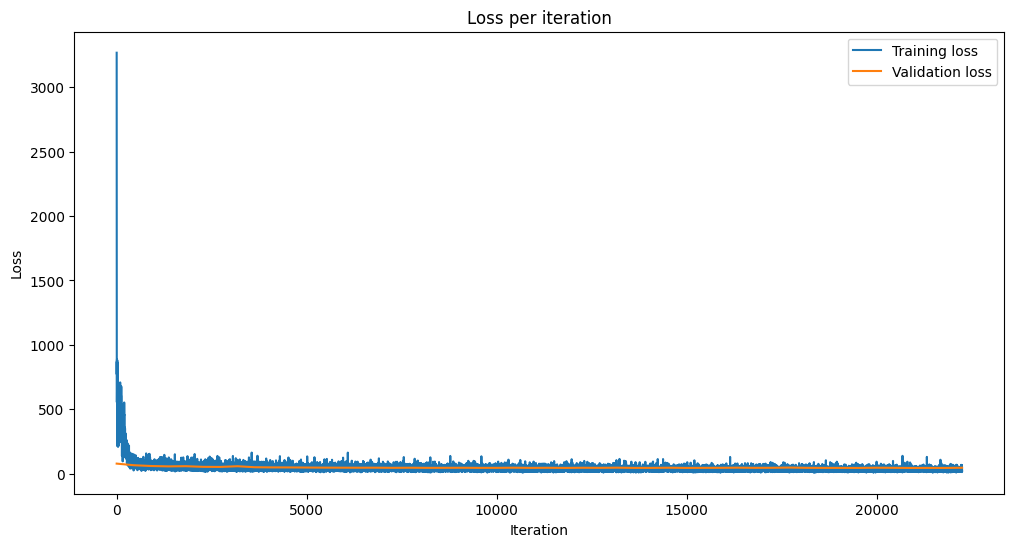

In [64]:
utils.plot_losses(model_3_losses['train_losses'], model_3_losses['val_losses'], model_3_losses['epochs'])

## Predict on the test dataset and show RMSE score

In [66]:
test_dataloader = MultimodalDataloader(x=x_test, images=x_test_image, y=y_test, batch_size=128)

# this ensures model's weights and biases do not change accidentally
model = model.eval()

pred = utils.run_inference(test_dataloader, model, is_model_2=False)

rmse_score = np.sqrt(mse(y_test, pred))

print(f'The RMSE loss for model 3 is {rmse_score}')

The RMSE loss for model 3 is 6.543725967407227
